Import libraries

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**Define Session** *for tensorflow*

In [2]:
sess = tf.InteractiveSession()

**Dummy example**

In [3]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = a + b
print(c.eval(feed_dict={a: 2, b: 3}))

5.0


**Gaussian Plot**

Define poinst on x axis

In [4]:
x = tf.linspace(-4.5, 4.5, 100)

Define parameters for Gaussian Plot


In [5]:
sigma = 0.5
mean = 0

Define Gaussian Function

In [6]:
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * tf.exp(-0.5 * ((x - mean) / sigma)**2) 

Get gaussian function values

In [7]:
x_result = x.eval()
gaussian_result = gaussian.eval()

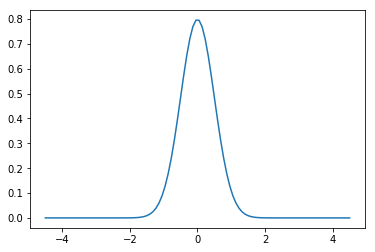

In [8]:
plt.plot(x_result, gaussian_result)
plt.show()

## Define 2D Gaussian Kernel

In [9]:
g_shape = gaussian.get_shape().as_list()

Reshape Gaussians

In [10]:
gaussian_1 = tf.reshape(gaussian, [g_shape[0], 1])
gaussian_2 = tf.reshape(gaussian, [1, g_shape[0]])

In [11]:
gauss_2d = tf.matmul(gaussian_1, gaussian_2)
print(gauss_2d.get_shape().as_list())

[100, 100]


Get max value from array

In [12]:
print(tf.reduce_max(gauss_2d).eval())

0.63138


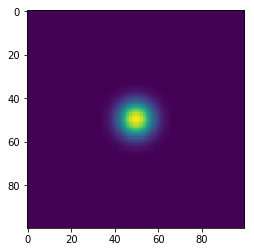

In [13]:
plt.imshow(gauss_2d.eval())
plt.show()

In [14]:
biass_t = tf.Variable(tf.ones([g_shape[0], g_shape[0]]))
lower_gauss = biass_t - gauss_2d

Initialize variables by running session

In [17]:
init = tf.global_variables_initializer()
sess.run(init)

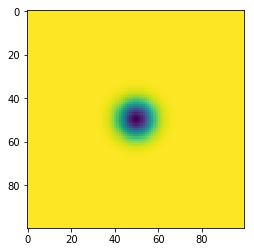

In [18]:
plt.imshow(lower_gauss.eval())
plt.show()

In [22]:
import skimage.data as data

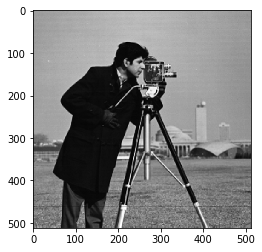

In [21]:
img_real = data.camera()
img_h, img_w = img_real.shape
plt.imshow(img_real, cmap="gray")
plt.show()

In [23]:
img = tf.placeholder(tf.float32, [img_h, img_w])
img_4d = tf.reshape(img, [1, int(img_h), int(img_w), 1])
filter_4d = tf.reshape(gauss_2d, [g_shape[0], g_shape[0], 1, 1])
conv_result = tf.nn.conv2d(img_4d, filter_4d, strides=[1, 1, 1, 1], padding="SAME")

In [24]:
img_in = img_real.astype(np.float32)
result_filtered = conv_result.eval(feed_dict={img: img_in})

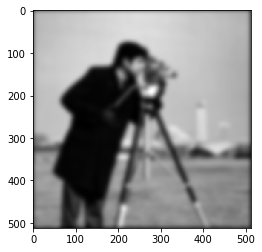

In [28]:
plt.imshow(result_filtered.reshape([img_h, img_w]), cmap="gray")
plt.show()